# Importing The DataSets

In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
original_data = pd.read_csv(r"phishing_dataset/train.csv")
test_data = pd.read_csv(r"phishing_dataset/test.csv")
original_data.shape

(71743, 56)

### Copying the datasets into other variable so that original dataset doesn't change 

In [9]:
data = original_data
d_test = test_data

In [10]:
original_data['label'].value_counts()

label
1.0    41804
0.0    29938
Name: count, dtype: int64

In [11]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,mw205674.txt,http://www.danangluxury.com,26,www.danangluxury.com,20.0,0.0,com,75.000000,1.000000,0.522907,0.049839,3.0,1.0,0.0,0.0,0.0,14.0,0.538,0.0,0.000,0.0,0.0,0.0,1.0,0.038,0.0,14.0,898.0,1.0,danangluxury,100.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,712147.txt,https://www.leedstownhall.co.uk,30,www.leedstownhall.co.uk,23.0,0.0,uk,100.000000,0.875000,0.028555,0.058238,2.0,2.0,0.0,0.0,0.0,16.0,0.533,0.0,0.000,0.0,0.0,0.0,2.0,0.067,1.0,1978.0,9381.0,1.0,leedstownhallco,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,37.0,41.0,46.0,104.0,3.0,93.0,1.0
2,806061.txt,https://www.mexicancafe.co.nz,28,www.mexicancafe.co.nz,21.0,0.0,nz,100.000000,0.857143,0.001993,0.065825,2.0,2.0,0.0,0.0,0.0,14.0,0.500,0.0,0.000,0.0,0.0,0.0,2.0,0.071,1.0,705.0,14273.0,1.0,mexicacafeco,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,4.0,14.0,51.0,0.0,7.0,1.0
3,164934.txt,https://www.usglassmag.com,25,www.usglassmag.com,18.0,0.0,com,100.000000,1.000000,0.522907,0.058172,3.0,1.0,0.0,0.0,0.0,12.0,0.480,0.0,0.000,0.0,0.0,0.0,1.0,0.040,1.0,1504.0,9490.0,1.0,usglassmag,100.0,100.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,40.0,26.0,25.0,106.0,9.0,193.0,1.0
4,8131216.txt,https://cloudflare-ipfs.com/ipfs/bafybeicivf4l...,93,cloudflare-ipfs.com,19.0,0.0,com,23.030879,0.733333,0.522907,0.035517,3.0,0.0,0.0,0.0,0.0,69.0,0.742,11.0,0.118,0.0,0.0,0.0,5.0,0.054,1.0,2.0,27983.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  1
IsDomainIP                    1
TLD                           1
URLSimilarityIndex            1
CharContinuationRate          1
TLDLegitimateProb             1
URLCharProb                   1
TLDLength                     1
NoOfSubDomain                 1
HasObfuscation                1
NoOfObfuscatedChar            1
ObfuscationRatio              1
NoOfLettersInURL              1
LetterRatioInURL              1
NoOfDegitsInURL               1
DegitRatioInURL               1
NoOfEqualsInURL               1
NoOfQMarkInURL                1
NoOfAmpersandInURL            1
NoOfOtherSpecialCharsInURL    1
SpacialCharRatioInURL         1
IsHTTPS                       1
LineOfCode                    1
LargestLineLength             1
HasTitle                      1
Title                         1
DomainTitleMatchScore         1
URLTitle

# Outlier Removal

In [13]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,71743.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,7.174200e+04,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000,71742.000000
mean,33.959160,21.333877,0.002509,79.374072,0.850539,0.260999,0.055974,2.761785,1.167893,0.001770,0.014050,0.000120,18.984430,0.512963,1.743191,0.027186,0.054543,0.027153,0.018636,2.255764,0.062385,0.777243,1170.666653,1.181402e+04,0.860263,51.165888,53.010153,0.363581,0.269326,0.623345,0.133297,0.040855,0.446182,0.230576,1.611580,0.044730,0.465083,0.419322,0.378091,0.101684,0.126035,0.240877,0.024881,0.492166,26.293120,6.764043,10.760893,65.316049,2.360960,49.796716,0.582699
std,43.607644,8.911225,0.050027,28.374734,0.214319,0.251429,0.010548,0.593954,0.590138,0.042037,0.459688,0.003645,34.945442,0.122473,8.260798,0.069762,0.531727,0.186940,0.446650,2.791575,0.031827,0.416099,4231.668656,1.223765e+05,0.346716,49.662718,49.554109,0.481033,0.443613,0.484551,0.339898,0.197955,0.497099,4.353621,4.813339,0.206711,0.498783,0.493452,0.484914,0.302234,0.331891,0.427619,0.155763,0.499942,82.001214,134.462004,31.300352,148.092902,13.995298,142.550670,0.493117
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001209,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,59.255675,0.692308,0.006411,0.051243,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,17.000000,2.020000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058164,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.517000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,454.000000,1.100000e+03,1.000000,88.888889,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,15.000000,0.000000,11.000000,1.000000
75%,33.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.063004,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.081000,1.000000,1304.000000,8.04700

In [14]:
data1 = data.copy()

In [15]:
upper_percentile = data['URLLength'].quantile(0.95)  
upper_percentile1 = data['DomainLength'].quantile(0.95)  
upper_percentile2 = data['NoOfSelfRef'].quantile(0.90)  
upper_percentile3 = data['NoOfEmptyRef'].quantile(0.90)  
upper_percentile4 = data['NoOfExternalRef'].quantile(0.90)  
upper_percentile5 = data['NoOfCSS'].quantile(0.95)  
upper_percentile6 = data['NoOfJS'].quantile(0.95)  
upper_percentile7 = data['NoOfImage'].quantile(0.95)  
upper_percentile8 = data['URLCharProb'].quantile(0.95) 

data =data[(data['URLLength']<= upper_percentile)]
data =data[(data['DomainLength']<= upper_percentile1)]
data =data[(data['NoOfSelfRef']<= upper_percentile2)]
data =data[(data['NoOfEmptyRef']<= upper_percentile3)]
data =data[(data['NoOfExternalRef']<= upper_percentile4)]
data =data[(data['NoOfCSS']<= upper_percentile5)]
data =data[(data['NoOfJS']<= upper_percentile6)]
data =data[(data['NoOfImage']<= upper_percentile7)]
data =data[(data['URLCharProb']<= upper_percentile8)]


In [16]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,4.579900e+04,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000,45799.000000
mean,29.195637,20.395380,0.000939,78.239515,0.855088,0.256040,0.055250,2.772026,1.131138,0.000699,0.002555,0.000049,15.667416,0.511690,0.849102,0.024341,0.008712,0.008887,0.001223,1.963689,0.064148,0.693072,562.700081,6.664300e+03,0.827311,48.036532,50.294941,0.308282,0.205026,0.554685,0.118212,0.041551,0.380358,0.111378,0.953907,0.029477,0.364921,0.313304,0.285290,0.062119,0.088845,0.178454,0.014760,0.401428,11.764777,3.423787,6.390314,27.311142,0.410642,20.847377,0.490142
std,8.620679,6.090982,0.030627,24.943772,0.198597,0.251586,0.009926,0.608374,0.557462,0.026424,0.107647,0.001993,7.762904,0.117522,2.352520,0.062951,0.111515,0.094546,0.050313,1.459324,0.032215,0.461224,1194.650872,7.323086e+04,0.377983,49.683435,49.679285,0.461789,0.403725,0.497006,0.322863,0.199563,0.485480,2.220492,3.089243,0.169140,0.481413,0.463842,0.451557,0.241375,0.284523,0.382898,0.120593,0.490193,17.342390,5.173309,8.341769,39.944170,0.999105,32.276823,0.499908
min,13.000000,4.000000,0.000000,12.076989,0.000000,0.000000,0.001209,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.132344,0.692308,0.005977,0.051018,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,0.000000,9.000000,1.030000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,0.000000,90.918803,1.000000,0.079963,0.057557,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.519000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,198.000000,6.140000e+02,1.000000,0.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000
75%,33.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062109,3.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.083000,1.000000,740.000000,3.937000e+03,1.000000,1

# Data Preprocessing

### Droping null Values because there are  very less of them wrt to dataset size

In [17]:
data = data.dropna()
d_test = d_test.dropna()

### Dropping the following columns because it doesn't effect that website is a phishing or not

In [18]:
data = data.drop(['URL' ,'Domain' , 'FILENAME' , 'TLD','Title'] , axis = 1)
d_test = d_test.drop(['URL' ,'Domain' , 'FILENAME' , 'TLD','Title'] , axis = 1)

### Checking Correlation and dropping one of the columns which have correlation greater than 0.8

In [19]:
data.corr() > 0.8

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DomainLength,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
IsDomainIP,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
URLSimilarityIndex,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
CharContinuationRate,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TLDLegitimateProb,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
URLCharProb,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TLDLength,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
NoOfSubDomain,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
HasObfuscation,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### URLSimilarityIndex also have corr coefficient greater than 0.8 with label columnn but it is a metric used to measure how closely a suspicious URL resembles a legimate one

In [20]:
data = data.drop(['NoOfDegitsInURL' , 'NoOfLettersInURL' ],axis = 1)
d_test = d_test.drop(['NoOfDegitsInURL' , 'NoOfLettersInURL'] ,axis = 1)

In [21]:
X = data.drop('label' , axis = 1)
Y = data['label']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)
d_test = scale.transform(d_test)

# Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

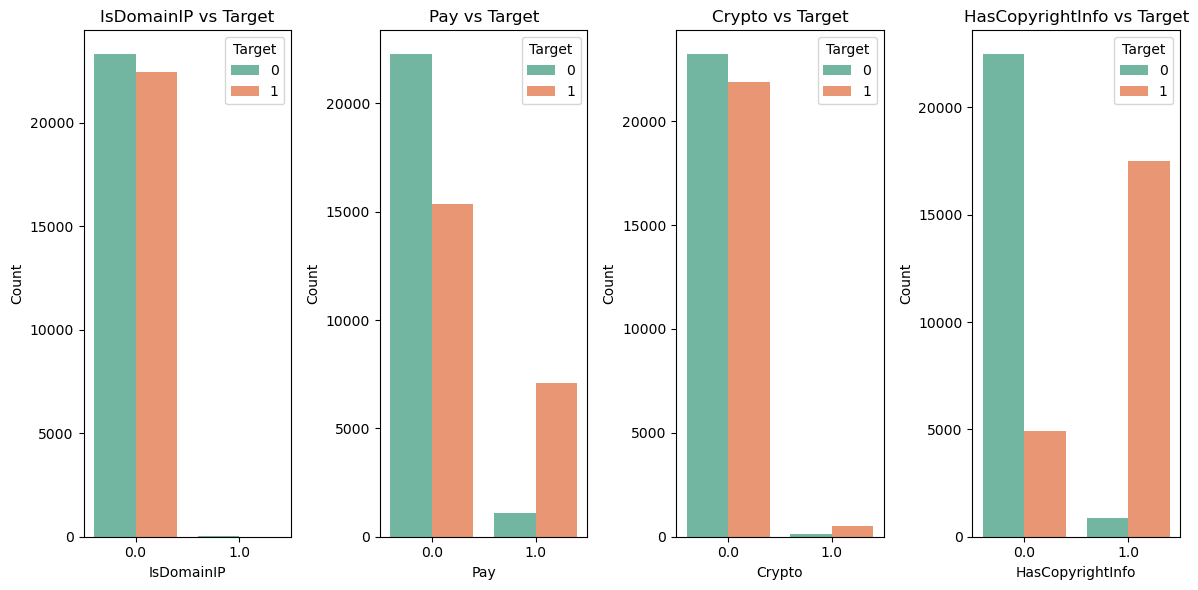

In [24]:
plt.figure(figsize=(12, 6))
binary_columns = ['IsDomainIP' , 'Pay' ,'Crypto' , 'HasCopyrightInfo']
for i, col in enumerate(binary_columns, 1):
    plt.subplot(1, len(binary_columns), i)
    
    sns.countplot(x=col, hue='label', data=data, palette='Set2')
    
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right', labels=['0', '1'])

plt.tight_layout()
plt.show()

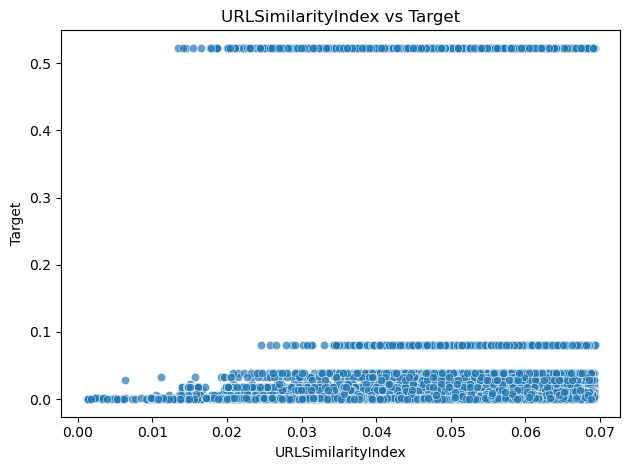

In [25]:
sns.scatterplot(x='URLCharProb', y='TLDLegitimateProb', data=data, alpha=0.7)

plt.title('URLSimilarityIndex vs Target')
plt.xlabel('URLSimilarityIndex')
plt.ylabel('Target')

# Adjust layout
plt.tight_layout()
plt.show()

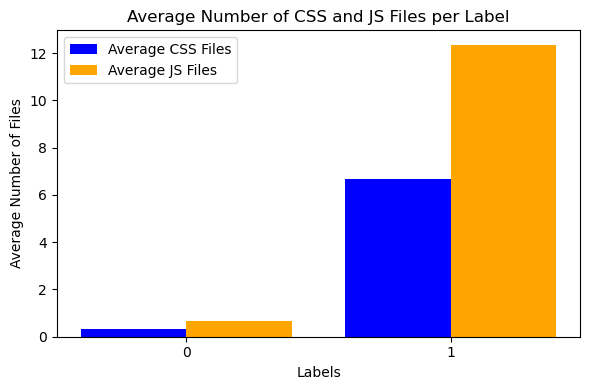

In [26]:
avg_data = data.groupby('label').mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(avg_data['label'] - 0.2, avg_data['NoOfCSS'], width=0.4, label='Average CSS Files', color='blue')
plt.bar(avg_data['label'] + 0.2, avg_data['NoOfJS'], width=0.4, label='Average JS Files', color='orange')

plt.xlabel('Labels')
plt.ylabel('Average Number of Files')
plt.title('Average Number of CSS and JS Files per Label')
plt.xticks(avg_data['label'])  # Set ticks to binary labels
plt.legend()
plt.tight_layout()
plt.show()

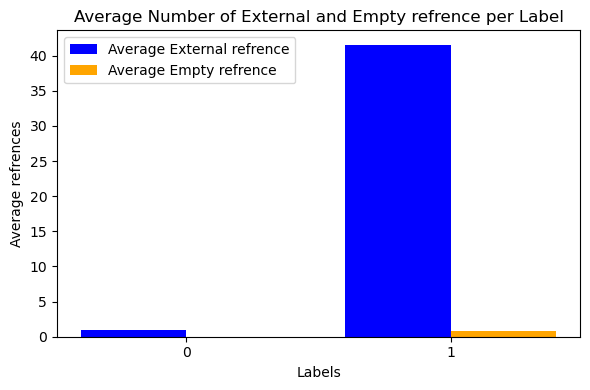

In [27]:
plt.figure(figsize=(6, 4))
plt.bar(avg_data['label'] - 0.2, avg_data['NoOfExternalRef'], width=0.4, label='Average External refrence', color='blue')
plt.bar(avg_data['label'] + 0.2, avg_data['NoOfEmptyRef'], width=0.4, label='Average Empty refrence', color='orange')

plt.xlabel('Labels')
plt.ylabel('Average refrences')
plt.title('Average Number of External and Empty refrence per Label')
plt.xticks(avg_data['label'])
plt.legend()
plt.tight_layout()
plt.show()

# Splitting the dataset into training and testing data

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size= 0.1 , random_state = 42)

In [29]:
print("No of training data : " , X_train.shape[0])
print("No of testing data : " , X_test.shape[0])

No of training data :  41219
No of testing data :  4580


# Model Selection

### Importing the requirments

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
Models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression" : LogisticRegression()
}

In [33]:
for name, clf in Models.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    print("Classifier:", name, "\nAccuracy:", accuracy, "\nF1-score:", f1,"\n\n")

Classifier: Random Forest 
Accuracy: 1.0 
F1-score: 1.0 


Classifier: Decision Tree 
Accuracy: 1.0 
F1-score: 1.0 


Classifier: Logistic Regression 
Accuracy: 0.9995633187772925 
F1-score: 0.9995633241942689 




In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model1 = DecisionTreeClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(model1, X, Y, cv=kf)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average accuracy: 1.0


## Deep learning Model

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [38]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(48,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation ='sigmoid'))

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, Y_train, epochs=40, 
                    validation_data=(X_test, Y_test))

Epoch 1/40
1289/1289 [==============================] - 12s 6ms/step - loss: 0.0983 - accuracy: 0.9604 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 2/40
1289/1289 [==============================] - 7s 6ms/step - loss: 0.0176 - accuracy: 0.9970 - val_loss: 0.0017 - val_accuracy: 0.9991
Epoch 3/40
1289/1289 [==============================] - 8s 6ms/step - loss: 0.0120 - accuracy: 0.9981 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 4/40
1289/1289 [==============================] - 7s 6ms/step - loss: 0.0113 - accuracy: 0.9978 - val_loss: 4.2151e-04 - val_accuracy: 1.0000
Epoch 5/40
1289/1289 [==============================] - 7s 6ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 6/40
1289/1289 [==============================] - 7s 6ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 4.4318e-04 - val_accuracy: 0.9998
Epoch 7/40
1289/1289 [==============================] - 7s 6ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 2.2233e-05 - 

In [41]:
model.evaluate(X_test, Y_test)

144/144 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9993


[0.004087693057954311, 0.9993450045585632]

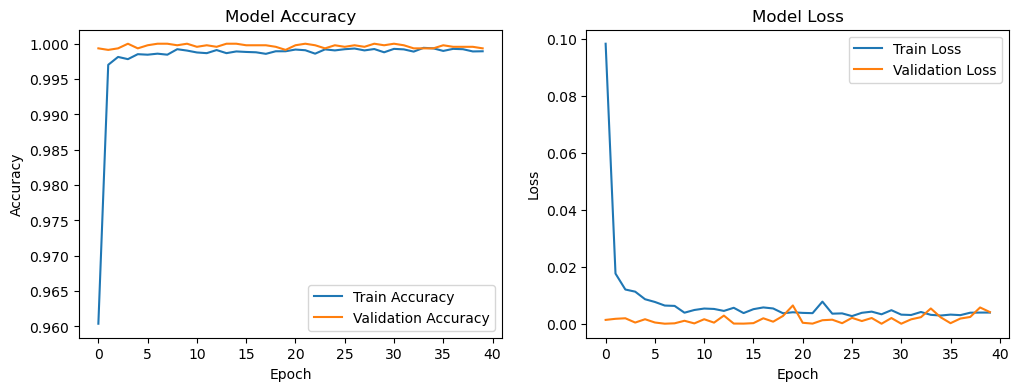

In [42]:
# Accuracy Curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
submit = test_data['FILENAME']

# Saving prediction into CSV file

In [46]:
Y_pred_DL = (model.predict(d_test) > 0.5).astype("int32").flatten()
Y_pred_DL = pd.Series(Y_pred_DL)
resultLR = pd.concat([submit, Y_pred_DL], axis=1)
resultLR.columns = ['FILENAME', 'label']
resultLR.to_csv('submissionDL.csv', header=["FILENAME", "label"], index=False)

938/938 [==============================] - 3s 3ms/step


In [48]:
model1.fit(X,Y)

DecisionTreeClassifier()

In [49]:
Y_pred_DT = (model1.predict(d_test) > 0.5).astype("int32").flatten()
Y_pred_DT

array([0, 0, 0, ..., 1, 0, 1])

In [50]:
Y_pred_DT = pd.Series(Y_pred_DT)
resultDT = pd.concat([submit, Y_pred_DT], axis=1)
resultDT.columns = ['FILENAME', 'label']
resultDT.to_csv('submissionDT.csv', header=["FILENAME", "label"], index=False)